In [42]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns

In [143]:
# Reading data as dataframe
data = pd.read_csv('../../data/featsel/data_scaled_minmax.csv')
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


In [45]:
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,worker,license,...,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_997,ethnicity_999,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


In [155]:
data.drop(columns = ['last_travel_date_month', 'last_travel_date_day', 'first_travel_date_month', 'first_travel_date_day'], inplace = True)

In [ ]:
data['date']

In [47]:
# data.drop(columns = ["school_cms_zone"], inplace = True)

#### Using the elbow method to find the best value for K

In [ ]:
#a list of the sse for each k
sse_result = []
potential_k = list(range(1, 30))
for k in potential_k:
  kmeans_model = KMeans(n_clusters = k)
  kmeans_model.fit(data)
  sse_result.append(kmeans_model.inertia_)

In [152]:
len(sse_result)

49

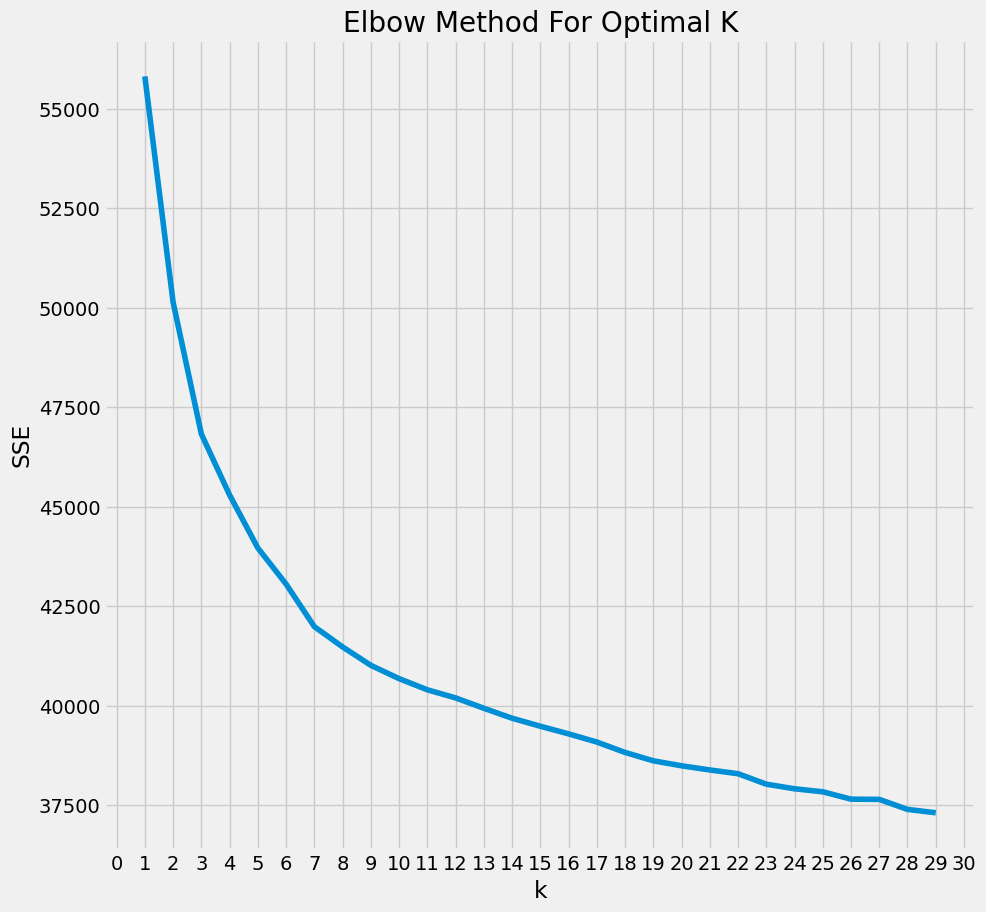

In [157]:
# Plot the elbow to find the best value for K 
plt.figure(figsize=(10, 10))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.plot(list(range(1, 30)), sse_result)
plt.xticks(range(0, 31))
plt.grid(visible=True)
plt.show()

From the plot above, a value of 2 could be a good value for k 

In [166]:
#Initinate a KMeans model with K as a number of clusters
k_means_model = KMeans(n_clusters = 4) 

In [ ]:
#fit the model, store the label of each sample and the centroids 
#of each cluster
predicted_labels = k_means_model.fit_predict(data)
predicted_centers = k_means_model.cluster_centers_

In [168]:
# # pca_85 = PCA(0.85)
# pca_data = pca_85.fit_transform(data)
# #reduce the dimentions of the centroids 
# pca_centers = pca_85.transform(predicted_centers)

In [169]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components=2, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_centers = pca_model.transform(predicted_centers)
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )
components_df["predicted_cluster"] = predicted_labels

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(3346, 2)

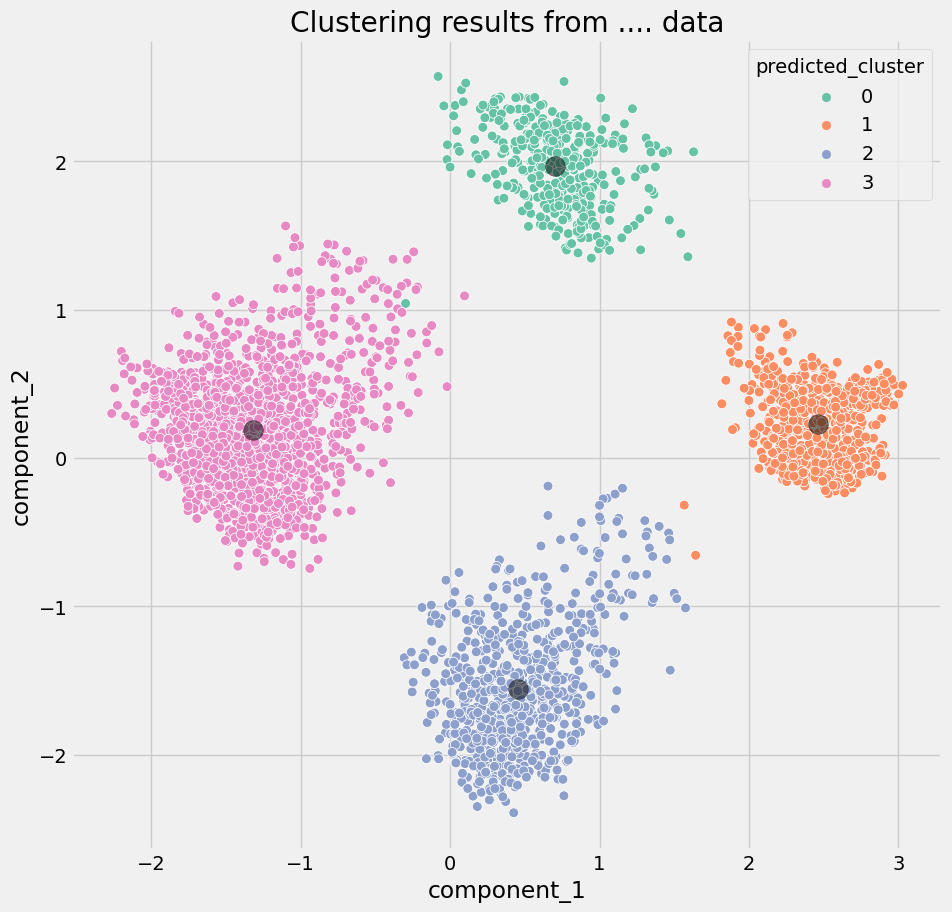

In [172]:
#plot the data and the centroid for each cluster
plt.figure(figsize=(10, 10))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(
   x="component_1",
   y="component_2",
   # z="component_3",
   s=50,
   data=components_df, 
   hue="predicted_cluster",  
   palette="Set2"
)
 
scat.set_title( "Clustering results from .... data") 
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [34]:
# kmeans_pipe = Pipeline(
#     [('pca', pca_model),
#      ('kmeans', k_means_model)]
#                 )
# kmeans_pipe.fit(data)
# kmeans_pipe['kmeans'].labels_

In [122]:
data.describe()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,worker,license,...,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,ethnicity_997,ethnicity_999,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,...,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,0.143487,0.107578,0.102238,0.011647,0.001215,0.020821,0.633443,0.613449,0.705918,0.760610,...,0.716975,0.020323,0.073819,0.007173,0.106695,0.075015,0.358597,0.837418,0.443246,0.899880
std,0.123036,0.130017,0.134154,0.059495,0.018089,0.065615,0.421992,0.371638,0.455697,0.426775,...,0.450536,0.141123,0.261516,0.084400,0.308771,0.263455,0.295778,0.369039,0.266530,0.300204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,1.000000,0.233333,1.000000
50%,0.134831,0.053763,0.035088,0.000000,0.000000,0.000000,1.000000,0.800000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,1.000000,0.400000,1.000000
75%,0.230337,0.172043,0.175439,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566667,1.000000,0.566667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components = 3, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_centers = pca_model.transform(predicted_centers)
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2", "component_3"],
    )
components_df["predicted_cluster"] = predicted_labels

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [174]:
from mpl_toolkits import mplot3d

C:\Users\hp\AppData\Local\Temp\ipykernel_16236\137127895.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(components_df['component_1'], components_df['component_2'], components_df['component_3'], cmap='Greens')


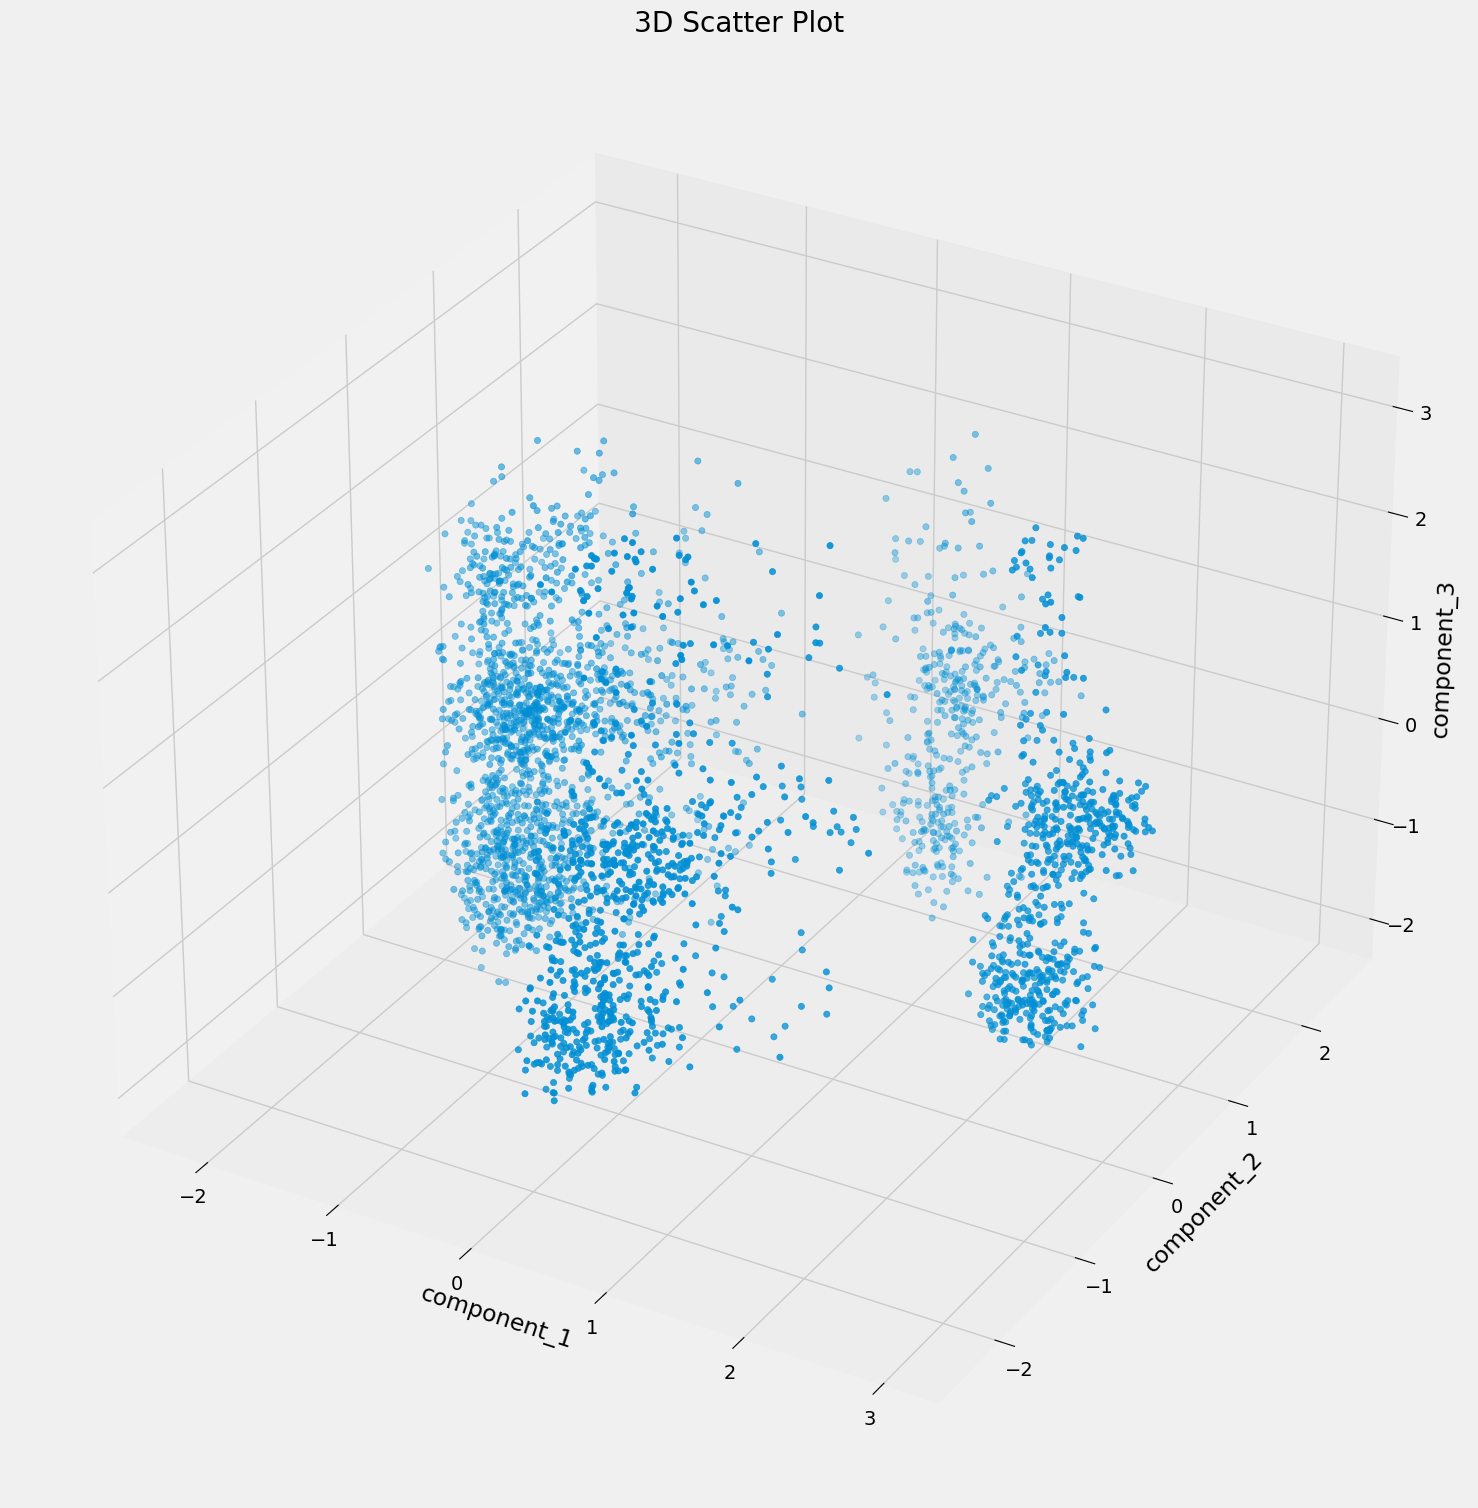

In [176]:
# Create a 3D figure
fig = plt.figure(figsize=(18, 18))
ax = plt.axes(projection='3d')
# Plot the data
ax.scatter3D(components_df['component_1'], components_df['component_2'], components_df['component_3'], cmap='Greens')

# Add labels and title
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_zlabel('component_3')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()